# Librerias Necesarias

In [1]:
import re
import spacy
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from spacy.lang.es.stop_words import STOP_WORDS

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)


# Guardar Modelos
import pickle

# Dataset

In [2]:
# Cargar Datos
dataset = pd.read_csv(r'../Datasets/Tweets_Sentimientos.csv')

In [3]:
dataset

,Tweet,Sentimiento
0,colombia recibio dosis de astrazeneca1234 dona...,neutral
1,a proposito del año pnv terminamos con cero pe...,positive
2,queremos agradecer al gobierno canadiense y su...,neutral
3,aestahora colombia recibe dosis de vacunas de ...,neutral
4,hablando de por que las vacunas no se deben us...,negative
...,...,...
1655,mi oufit de hoy para ir a vacunarme creo que h...,positive
1656,en españa el proceso de vacunacion ya va por e...,negative
1657,pues porque apenas empezamos webon por gente c...,positive
1658,en el parque de los novios todos sin tapabocas...,negative


## Cantdad de sentimientos por categoria

<AxesSubplot:xlabel='Sentimiento', ylabel='Tweet'>

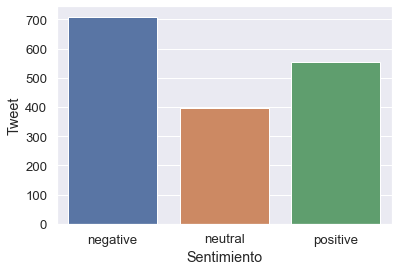

In [4]:
grafico_sentimientos_datasetInicial = dataset.groupby('Sentimiento').count()
sns.barplot(data = grafico_sentimientos_datasetInicial, x = grafico_sentimientos_datasetInicial.index, y = 'Tweet')

# Datos de entrenamiento y Testeo

In [5]:
# Datos de entrenamiento y testeo
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['Tweet'], dataset['Sentimiento'], test_size = 0.30, random_state = 0)

In [6]:
# Datos de Entrenamiento
df_train70 = pd.DataFrame()
df_train70['Tweet'] = train_X
df_train70['Sentimiento'] = train_Y
df_train70['Tweet Limpio'] = df_train70['Tweet'].str.lower()

# Datos de Prueba
df_test30 = pd.DataFrame()
df_test30['Tweet'] = test_X
df_test30['Sentimiento'] = test_Y
df_test30['Tweet Limpio'] = df_test30['Tweet'].str.lower()

In [7]:
df_train70

,Tweet,Sentimiento,Tweet Limpio
39,el gobierno nos quiere ver la cara nos quieren...,negative,el gobierno nos quiere ver la cara nos quieren...
1567,vimos el desastre sanitario que nos provocaron...,negative,vimos el desastre sanitario que nos provocaron...
1246,al margen de conspiracion o no pienso que la v...,negative,al margen de conspiracion o no pienso que la v...
840,ya fue a mercar claro que a usted eso no lo af...,negative,ya fue a mercar claro que a usted eso no lo af...
651,recuerden vacunarse para no tener problemas en...,positive,recuerden vacunarse para no tener problemas en...
...,...,...,...
835,el gobierno no piensan adquirir mas vacunas pf...,negative,el gobierno no piensan adquirir mas vacunas pf...
1216,cuando veo que janssen es trending pienso que ...,neutral,cuando veo que janssen es trending pienso que ...
1653,tanto venezolano exigiendo vacunas para el cov...,negative,tanto venezolano exigiendo vacunas para el cov...
559,ni loco me pongo yo una vaina de jansse esa mo...,negative,ni loco me pongo yo una vaina de jansse esa mo...


## Cantidad de sentimientos por categoria en datos de entrenamiento

<AxesSubplot:xlabel='Sentimiento', ylabel='Tweet'>

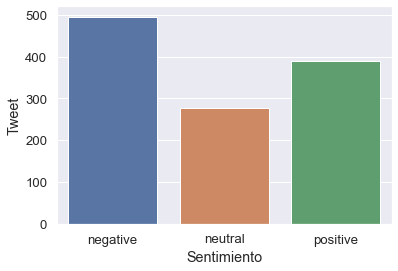

In [8]:
grafico_sentimientos_datasetEntrenamiento = df_train70.groupby('Sentimiento').count()
sns.barplot(data = grafico_sentimientos_datasetEntrenamiento, x = grafico_sentimientos_datasetInicial.index, y = 'Tweet')

In [9]:
df_test30

,Tweet,Sentimiento,Tweet Limpio
1265,pero este hombre tenia dosis de vacuna pfizer ...,negative,pero este hombre tenia dosis de vacuna pfizer ...
342,no me vacuno por nada del mundo un vecino sufr...,negative,no me vacuno por nada del mundo un vecino sufr...
381,en el centro comercial guacari aun estan coloc...,positive,en el centro comercial guacari aun estan coloc...
511,si presentas sintomas despues de vacunarte con...,neutral,si presentas sintomas despues de vacunarte con...
1205,alguien me explica pq uno no puede elegir que ...,negative,alguien me explica pq uno no puede elegir que ...
...,...,...,...
1277,critico las medidas inefectivas contra el covi...,positive,critico las medidas inefectivas contra el covi...
792,que dirian nuestros ancestros cayendo en los t...,negative,que dirian nuestros ancestros cayendo en los t...
1359,sinovac tambien es muy buena ha tenido mala pr...,positive,sinovac tambien es muy buena ha tenido mala pr...
77,a todos los de astrazeneca les estan aplicando...,neutral,a todos los de astrazeneca les estan aplicando...


## Cantidad de sentimientos por categoria en datos de testeo

<AxesSubplot:xlabel='Sentimiento', ylabel='Tweet'>

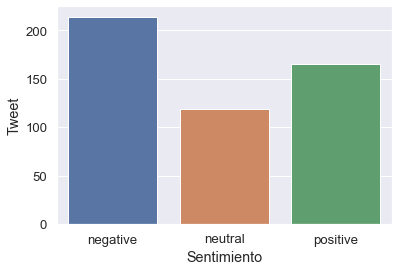

In [10]:
grafico_sentimientos_datasetTesteo = df_test30.groupby('Sentimiento').count()
sns.barplot(data = grafico_sentimientos_datasetTesteo, x = grafico_sentimientos_datasetInicial.index, y = 'Tweet')

In [11]:
# Guardar los nuevos Datasets como csv
df_train70.to_csv(r'../Datasets/Tweets_Sentimientos_Train70.csv')
df_test30.to_csv(r'../Datasets/Tweets_Sentimientos_Test30.csv')

# Funciones de Limpieza de Tweets 

In [12]:
# Funciones para la limpieza de los Datasets
def limpiezaTweets(tweet):
    eliminarUsuario = re.compile('@\w+')
    eliminarUrl = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    eliminarHtmlDatos = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    eliminarEspaciosExtra = re.compile('[ ]{2,}')
    eliminarCambiosLinea = re.compile('\n+')

    resultado = eliminarUrl.sub('', tweet)
    resultado = eliminarUsuario.sub('', resultado)
    resultado = eliminarHtmlDatos.sub('', resultado)
    resultado = eliminarEspaciosExtra.sub('', resultado)
    resultado = eliminarCambiosLinea.sub('', resultado)
    resultado = re.findall('\w+', resultado)                                    # Busca datos alfanumericos
    resultado = [''.join(x for x in i if x.isalpha()) for i in resultado]
    resultado = ' '.join(resultado) 
    return resultado


def removerStopWords(tweet):
    resultado = ''
    if tweet != None:
        tweet = tweet.split(" ")
        resultado = list(filter(lambda l: (l not in STOP_WORDS and len(l) > 2), tweet))
        resultado = ' '.join(resultado)
    return resultado


def removerTildes(tweet):
    remplazar = {
        'á' : 'a',
        'é' : 'e',
        'í' : 'i',
        'ó' : 'o',
        'ú' : 'u'
    }
    for i, j in remplazar.items():
        tweet = tweet.replace(i, j)
    return tweet

In [13]:
# Aplicar la limpieza a los datasets
df_train70['Tweet Limpio'] = df_train70['Tweet Limpio'].apply(limpiezaTweets)
df_train70['Tweet Limpio'] = df_train70['Tweet Limpio'].apply(removerStopWords)
df_train70['Tweet Limpio'] = df_train70['Tweet Limpio'].apply(removerTildes)

df_test30['Tweet Limpio'] = df_test30['Tweet Limpio'].apply(limpiezaTweets)
df_test30['Tweet Limpio'] = df_test30['Tweet Limpio'].apply(removerStopWords)
df_test30['Tweet Limpio'] = df_test30['Tweet Limpio'].apply(removerTildes)

In [14]:
# Guardar los nuevos cambios a los Datasets 
df_train70.to_csv(r'../Datasets/Tweets_Sentimientos_Train70.csv')
df_test30.to_csv(r'../Datasets/Tweets_Sentimientos_Test30.csv')

In [15]:
df_train70

,Tweet,Sentimiento,Tweet Limpio
39,el gobierno nos quiere ver la cara nos quieren...,negative,gobierno cara quieren obligar ponernos astraze...
1567,vimos el desastre sanitario que nos provocaron...,negative,vimos desastre sanitario provocaron sabiendas
1246,al margen de conspiracion o no pienso que la v...,negative,margen conspiracion pienso vacuna funciona eda...
840,ya fue a mercar claro que a usted eso no lo af...,negative,mercar afecta recibe comisiones pfizer moderna...
651,recuerden vacunarse para no tener problemas en...,positive,recuerden vacunarse problemas lugares publicos...
...,...,...,...
835,el gobierno no piensan adquirir mas vacunas pf...,negative,gobierno piensan adquirir vacunas pfizer esper...
1216,cuando veo que janssen es trending pienso que ...,neutral,veo janssen trending pienso vacuna covid reali...
1653,tanto venezolano exigiendo vacunas para el cov...,negative,venezolano exigiendo vacunas covid aca colombi...
559,ni loco me pongo yo una vaina de jansse esa mo...,negative,loco pongo vaina jansse monodosis servir


In [16]:
df_test30

,Tweet,Sentimiento,Tweet Limpio
1265,pero este hombre tenia dosis de vacuna pfizer ...,negative,hombre tenia dosis vacuna pfizer murio
342,no me vacuno por nada del mundo un vecino sufr...,negative,vacuno mundo vecino sufrio enfermedad cardiaca...
381,en el centro comercial guacari aun estan coloc...,positive,centro comercial guacari colocando pfizer dese...
511,si presentas sintomas despues de vacunarte con...,neutral,presentas sintomas vacunarte pfizer acude medi...
1205,alguien me explica pq uno no puede elegir que ...,negative,alguien explica elegir vacuna pone dosis pfize...
...,...,...,...
1277,critico las medidas inefectivas contra el covi...,positive,critico medidas inefectivas covid vine aplicar...
792,que dirian nuestros ancestros cayendo en los t...,negative,dirian ancestros cayendo trucos jefes mundo va...
1359,sinovac tambien es muy buena ha tenido mala pr...,positive,sinovac mala propaganda visto excelentes resul...
77,a todos los de astrazeneca les estan aplicando...,neutral,astrazeneca aplicando dosis mayores jfernandez...


# Matriz TF-IDF

In [17]:
# TF-IDF
tf_idf_vectores = TfidfVectorizer(max_features = 5000)
tf_idf_vectores.fit(dataset['Tweet'])


# Guardar TF-IDF
with open('../Modelos/tfidfVectores.pickle', 'wb') as archivo_tf_idf:
    pickle.dump(tf_idf_vectores, archivo_tf_idf)
    

train_X_tfidf = tf_idf_vectores.transform(df_train70['Tweet Limpio'])
test_X_tfidf = tf_idf_vectores.transform(df_test30['Tweet Limpio'])

In [18]:
# Revision de las palabras dentro del vocabulario
#print(tf_idf_vectores.vocabulary_)

# Modelos

## Modelo SVM (Support Vector Machine) 

In [19]:
# Entrenamiento del modelo SVM (SUPPORT VECTOR MACHINE)
modeloSVM = SVC(C = 1.0, kernel = 'rbf')
modeloSVM.fit(train_X_tfidf, train_Y)
print('Prediccion del modelo con SVM: {}'.format(modeloSVM.score(train_X_tfidf, train_Y)))

Prediccion del modelo con SVM: 0.9931153184165232


In [20]:
# Testeo del modelo SVM (SUPPORT VECTOR MACHINE)
prediccionModeloSVM = modeloSVM.predict(test_X_tfidf)
testeo_predicciones_SVM = pd.DataFrame()
testeo_predicciones_SVM['Tweet'] = test_X
testeo_predicciones_SVM['Sentimiento'] = prediccionModeloSVM

In [21]:
testeo_predicciones_SVM

,Tweet,Sentimiento
1265,pero este hombre tenia dosis de vacuna pfizer ...,negative
342,no me vacuno por nada del mundo un vecino sufr...,negative
381,en el centro comercial guacari aun estan coloc...,positive
511,si presentas sintomas despues de vacunarte con...,positive
1205,alguien me explica pq uno no puede elegir que ...,negative
...,...,...
1277,critico las medidas inefectivas contra el covi...,negative
792,que dirian nuestros ancestros cayendo en los t...,negative
1359,sinovac tambien es muy buena ha tenido mala pr...,negative
77,a todos los de astrazeneca les estan aplicando...,negative


### Cantidad de sentimientos por categoria en la prediccion por SVM

<AxesSubplot:xlabel='Sentimiento', ylabel='Tweet'>

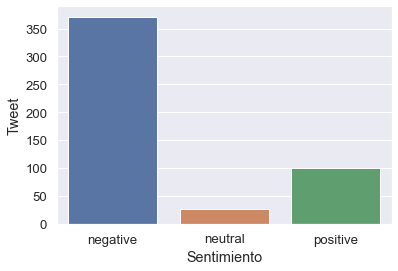

In [22]:
grafico_sentimientos_datasetPredicc_SVM = testeo_predicciones_SVM.groupby('Sentimiento').count()
sns.barplot(data = grafico_sentimientos_datasetPredicc_SVM, x = grafico_sentimientos_datasetInicial.index, y = 'Tweet')

In [23]:
testeo_predicciones_SVM.to_csv(r'../Datasets/TesteoSVM.csv')

### Reporte metricas para el modelo SVM

In [24]:
# Reporte de metricas (F1-SCORE, RECALL, PRECISION, ACCURACY) en el modelo SVM
print('Reporte de clasificación:')
print(classification_report(prediccionModeloSVM, test_Y))

Reporte de clasificación:
              precision    recall  f1-score   support

    negative       0.89      0.51      0.65       371
     neutral       0.17      0.74      0.27        27
    positive       0.36      0.59      0.45       100

    accuracy                           0.54       498
   macro avg       0.47      0.62      0.46       498
weighted avg       0.75      0.54      0.59       498



## Modelo Random Forest

In [25]:
# Aplicando la validacion cruzada
modelo_randomForest = RandomForestClassifier()

parametrosImportantes = {
   'bootstrap' : [True],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators': [100] 
}

gridsearch = GridSearchCV(estimator = modelo_randomForest, param_grid = parametrosImportantes, cv = 2, n_jobs = 1)
gridsearch.fit(train_X_tfidf, train_Y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [26]:
# Entrenamiento del modelo Random Forest
modelo_randomForest = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_features = 'log2', n_estimators = 100)
modelo_randomForest.fit(train_X_tfidf, train_Y)
print('Prediccion del modelo con Random Forest: {}'.format(modelo_randomForest.score(train_X_tfidf, train_Y)))

# Guardar Modelo Entrenado
with open('../Modelos/modelo_randomForest.pickle', 'wb') as archivo_RF:
    pickle.dump(modelo_randomForest, archivo_RF)

Prediccion del modelo con Random Forest: 0.9982788296041308


In [27]:
# Testeo del modelo con Random Forest
prediccionModeloRandomForest = modelo_randomForest.predict(test_X_tfidf)
testeo_predicciones_RandomForest = pd.DataFrame()
testeo_predicciones_RandomForest['Tweet'] = test_X
testeo_predicciones_RandomForest['Sentimiento'] = prediccionModeloRandomForest

In [28]:
testeo_predicciones_RandomForest

,Tweet,Sentimiento
1265,pero este hombre tenia dosis de vacuna pfizer ...,negative
342,no me vacuno por nada del mundo un vecino sufr...,negative
381,en el centro comercial guacari aun estan coloc...,positive
511,si presentas sintomas despues de vacunarte con...,positive
1205,alguien me explica pq uno no puede elegir que ...,negative
...,...,...
1277,critico las medidas inefectivas contra el covi...,positive
792,que dirian nuestros ancestros cayendo en los t...,negative
1359,sinovac tambien es muy buena ha tenido mala pr...,negative
77,a todos los de astrazeneca les estan aplicando...,negative


### Cantidad de sentimientos por categoria en la prediccion por Random Forest

<AxesSubplot:xlabel='Sentimiento', ylabel='Tweet'>

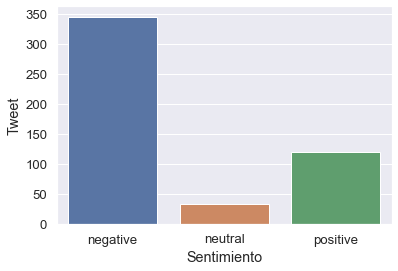

In [29]:
grafico_sentimientos_datasetPredicc_RF = testeo_predicciones_RandomForest.groupby('Sentimiento').count()
sns.barplot(data = grafico_sentimientos_datasetPredicc_RF, x = grafico_sentimientos_datasetInicial.index, y = 'Tweet')

In [30]:
testeo_predicciones_RandomForest.to_csv(r'../Datasets/TesteoRandomForest.csv')

### Reporte metricas para el modelo con Random Forest

In [31]:
# Reporte de metricas (F1-SCORE, RECALL, PRECISION, ACCURACY) en el modelo SVM
print('Reporte de clasificación:')
print(classification_report(prediccionModeloRandomForest, test_Y))

Reporte de clasificación:
              precision    recall  f1-score   support

    negative       0.84      0.52      0.64       345
     neutral       0.18      0.64      0.28        33
    positive       0.40      0.55      0.46       120

    accuracy                           0.54       498
   macro avg       0.47      0.57      0.46       498
weighted avg       0.69      0.54      0.58       498



# Predicción de nuevos Tweets

In [32]:
tweets = pd.read_csv(r'../Datasets/Tweets_Prediccion.csv')
tweets

,Tweet,Sentimiento
0,por que la vacuna del vph no es publica y teng...,NaN
1,cuando creas que tienes un mal dia piensa en l...,NaN
2,perdonen mi ignorancia entonces si astrazeneca...,NaN
3,llevo mas de año diciendo que la vacuna que me...,NaN
4,en israel de enero a julio llevan ya mas falle...,NaN
...,...,...
335,donde estan vacunando con la pfizer no quiero ...,NaN
336,mala idea ponerme la pfizer hoy parce me estoy...,NaN
337,aqui re arrepentida de ponerme pfizer,NaN
338,duda solo tengo vacuna en febrero de aztra pue...,NaN


In [33]:
# Funcion para aplicar limpieza en los nuevos tweets
def limpiezaNuevosTweets(dataframe):
    
    tweets = dataframe
    
    dataframe['Tweet Limpio'] = dataframe['Tweet'].str.lower()
    dataframe['Tweet Limpio'] = dataframe['Tweet Limpio'].apply(limpiezaTweets)
    dataframe['Tweet Limpio'] = dataframe['Tweet Limpio'].apply(removerStopWords)
    dataframe['Tweet Limpio'] = dataframe['Tweet Limpio'].apply(removerTildes)
    
    return tweets

tweets = limpiezaNuevosTweets(tweets)
tweets

,Tweet,Sentimiento,Tweet Limpio
0,por que la vacuna del vph no es publica y teng...,NaN,vacuna vph publica pagar mil pesos dosis mujer...
1,cuando creas que tienes un mal dia piensa en l...,NaN,creas tienes piensa vacunado astrazeneca acaba...
2,perdonen mi ignorancia entonces si astrazeneca...,NaN,perdonen ignorancia astrazeneca potencialmente...
3,llevo mas de año diciendo que la vacuna que me...,NaN,llevo año diciendo vacuna pusieron astrazeneca...
4,en israel de enero a julio llevan ya mas falle...,NaN,israel enero julio llevan fallecidos completo ...
...,...,...,...
335,donde estan vacunando con la pfizer no quiero ...,NaN,vacunando pfizer quiero ponerme moderna
336,mala idea ponerme la pfizer hoy parce me estoy...,NaN,mala idea ponerme pfizer parce muriendo mesa
337,aqui re arrepentida de ponerme pfizer,NaN,arrepentida ponerme pfizer
338,duda solo tengo vacuna en febrero de aztra pue...,NaN,duda vacuna febrero aztra ponerme pfizer debo ...


## Se aplica el modelo seleccionado para la prediccion de los nuevos Tweets

In [34]:
# Se aplica la matriz tf-idf a los nuevos tweets para la prediccion
tweets_X_tfidf = tf_idf_vectores.transform(tweets['Tweet'])

prediccionNuevosTweetsModeloRandomForest = modelo_randomForest.predict(tweets_X_tfidf)
tweets_predicciones_RandomForest = pd.DataFrame()
tweets_predicciones_RandomForest['Tweet'] = tweets['Tweet']
tweets_predicciones_RandomForest['Sentimiento'] = prediccionNuevosTweetsModeloRandomForest

In [35]:
tweets_predicciones_RandomForest

,Tweet,Sentimiento
0,por que la vacuna del vph no es publica y teng...,negative
1,cuando creas que tienes un mal dia piensa en l...,negative
2,perdonen mi ignorancia entonces si astrazeneca...,negative
3,llevo mas de año diciendo que la vacuna que me...,negative
4,en israel de enero a julio llevan ya mas falle...,negative
...,...,...
335,donde estan vacunando con la pfizer no quiero ...,negative
336,mala idea ponerme la pfizer hoy parce me estoy...,negative
337,aqui re arrepentida de ponerme pfizer,negative
338,duda solo tengo vacuna en febrero de aztra pue...,negative


In [36]:
tweets_predicciones_RandomForest.to_csv(r'../Datasets/Tweets_Prediccion_RandomForest.csv')

<AxesSubplot:xlabel='Sentimiento', ylabel='Tweet'>

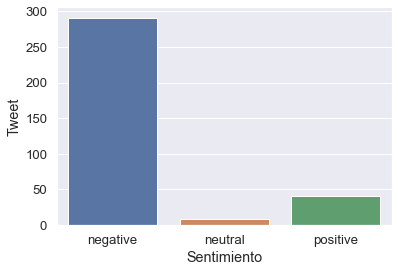

In [37]:
grafico_sentimientos_datasetPredicc_RF_NUEVO = tweets_predicciones_RandomForest.groupby('Sentimiento').count()
sns.barplot(data = grafico_sentimientos_datasetPredicc_RF_NUEVO, x = grafico_sentimientos_datasetInicial.index, y = 'Tweet')